# Proyek Analisis Data: Bike Sharing
- **Nama: Nur Arief Fauzian Rakhman**
- **Email: nurarief1123@gmail.com**
- **ID Dicoding: nurarief**

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren Penggunaan Sepeda dari Waktu ke Waktu? Apakah Ada Pengaruh Hari Libur
- Apakah Cuaca terhadap Jumlah Penggunaan Sepeda?
- Berapa Menyimpan Stok Sepeda yang Optimal Setiap Hari dan setiap jam?




## Import Semua Packages/Library yang Digunakan

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Gathering


In [3]:
filepath_day = '/content/drive/My Drive/Data/day.csv'
dayData = pd.read_csv(filepath_day)
dayData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
filepath_hour = '/content/drive/My Drive/Data/hour.csv'
hourData = pd.read_csv(filepath_hour)
hourData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
bike_df = hourData.merge(dayData, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### Assessing Data

In [10]:
# melihat tipe data yang dipakai
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

In [12]:
# Deskriptif statistik
bike_df.describe()

,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
# melihat missing value
bike_df.isnull().sum()

,0
instant_hour,0
dteday,0
season_hour,0
yr_hour,0
mnth_hour,0
hr,0
holiday_hour,0
weekday_hour,0
workingday_hour,0
weathersit_hour,0


**Insight:**
- Dataset bike_df relatif bersih, tanpa missing value.
- Beberapa kolom perlu diubah tipe datanya agar lebih sesuai untuk analisis.
- Statistik deskriptif memberikan gambaran awal tentang distribusi data dan pola yang mungkin ada.
- Data ini dapat digunakan untuk menganalisis tren penggunaan sepeda dari waktu ke waktu,
-pengaruh hari libur dan cuaca, dan menentukan stok sepeda yang optimal.

### Cleaning Data


In [15]:
# Mengubah kolom sesuai tipedata
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])

In [22]:
#membulatkan nilai hingga dua desimal
bike_df['temp_day'] = bike_df['temp_day'].round(2)
bike_df['hum_day'] = bike_df['hum_day'].round(2)

In [37]:
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.34,0.363625,0.81,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.34,0.363625,0.81,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.34,0.363625,0.81,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.34,0.363625,0.81,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.34,0.363625,0.81,0.160446,331,654,985


In [19]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

**Insight:**
- kolom 'dteday' yang awalnya bertipe object diubah menjadi tipe datetime agar memudahkan analisis terkait waktu dan tren.

- Membulatkan temp_day dan hum_day untuk Mengurangi Detail yang Tidak Relevan

### Explore ...

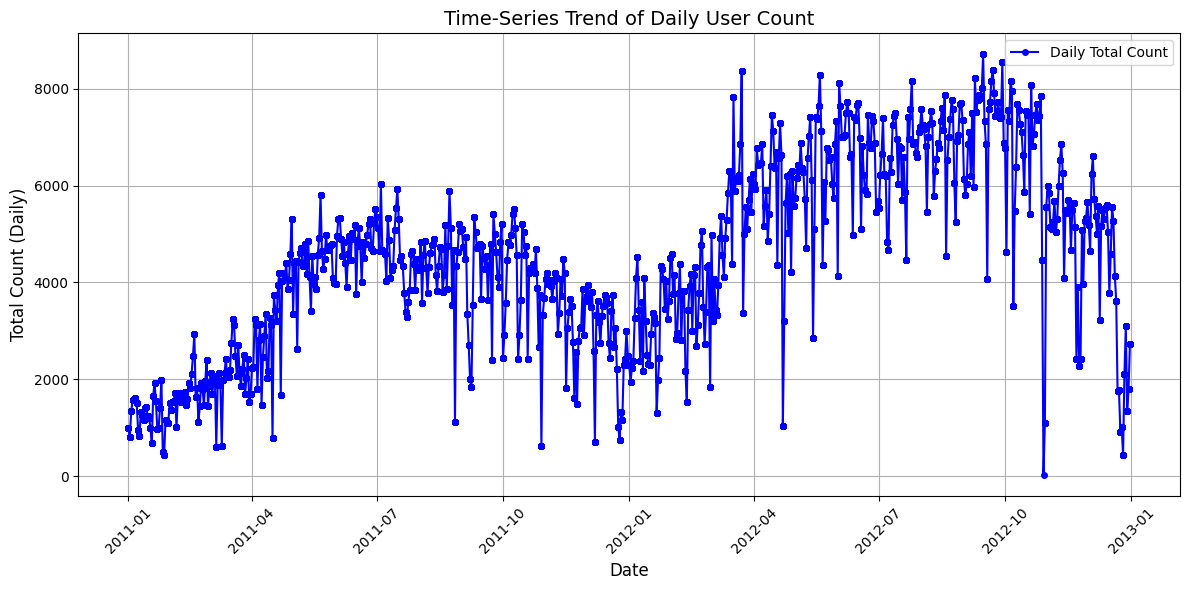

In [39]:
# Plot daily count over time
plt.figure(figsize=(12, 6))
plt.plot(bike_df['dteday'], bike_df['cnt_day'], label='Daily Total Count', color='blue', marker='o', linestyle='-', markersize=4)
plt.title('Time-Series Trend of Daily User Count', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Count (Daily)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

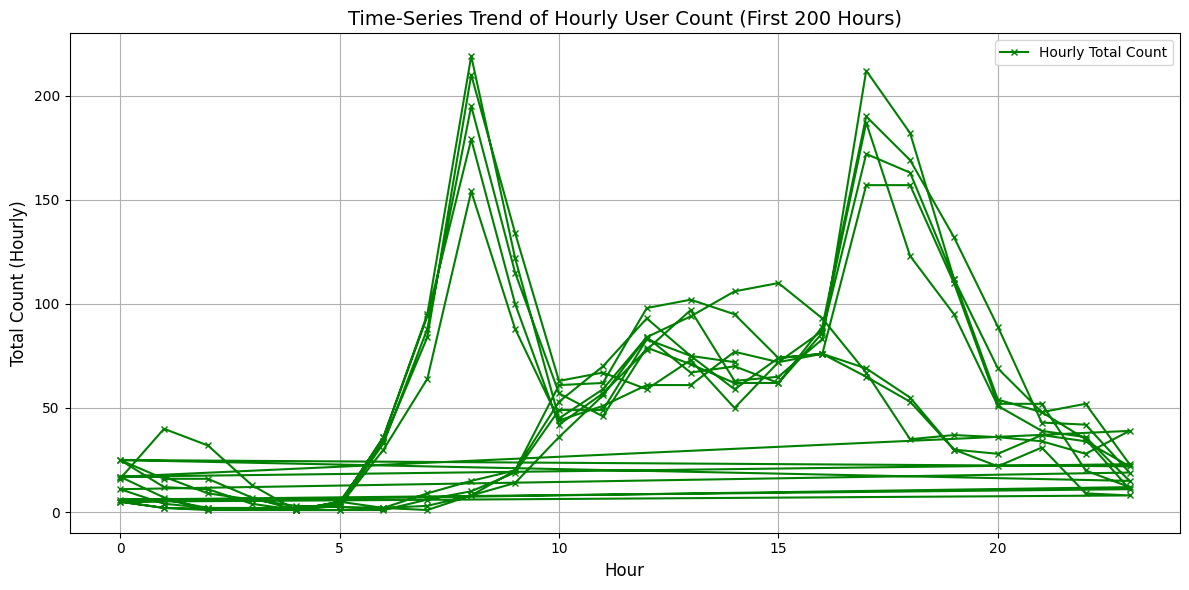

In [43]:
# Plot hourly count over time (for first 200 data points to avoid clutter)
plt.figure(figsize=(12, 6))
plt.plot(bike_df['hr'][:200], bike_df['cnt_hour'][:200], label='Hourly Total Count', color='green', marker='x', linestyle='-', markersize=4)
plt.title('Time-Series Trend of Hourly User Count (First 200 Hours)', fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Count (Hourly)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


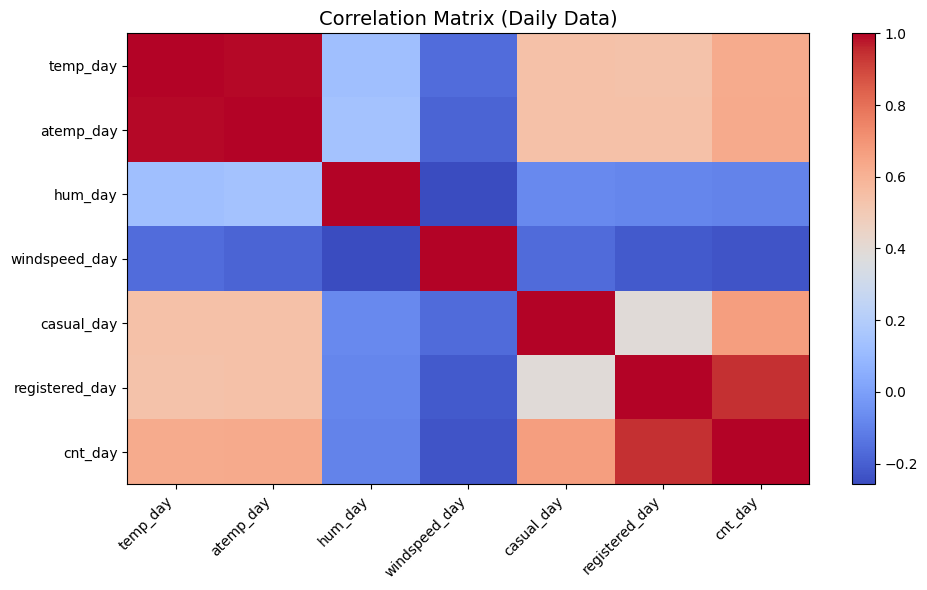

,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
temp_day,1.000000,0.991529,0.129466,-0.161452,0.539280,0.536335,0.625015
atemp_day,0.991529,1.000000,0.143555,-0.187460,0.540420,0.540841,0.629054
hum_day,0.129466,0.143555,1.000000,-0.257587,-0.072761,-0.082525,-0.092516
windspeed_day,-0.161452,-0.187460,-0.257587,1.000000,-0.165846,-0.213500,-0.231340
casual_day,0.539280,0.540420,-0.072761,-0.165846,1.000000,0.386692,0.669199
registered_day,0.536335,0.540841,-0.082525,-0.213500,0.386692,1.000000,0.944052
cnt_day,0.625015,0.629054,-0.092516,-0.231340,0.669199,0.944052,1.000000


In [45]:
# Correlation matrix for daily data
correlation_daily = bike_df[['temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'casual_day', 'registered_day', 'cnt_day']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
plt.imshow(correlation_daily, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_daily.columns)), correlation_daily.columns, rotation=45, ha="right")
plt.yticks(range(len(correlation_daily.columns)), correlation_daily.columns)
plt.title('Correlation Matrix (Daily Data)', fontsize=14)
plt.tight_layout()
plt.show()

# Display the correlation values
correlation_daily


**Insight:**
- time series tren menunjukkan jumlah total pengguna harian (cnt_day) dari waktu ke waktu. Hal ini memberi kita gambaran tentang tren aktivitas pengguna dari hari ke hari. Kita dapat mengamati fluktuasi, yang mungkin sesuai dengan perubahan musim, hari libur, atau kondisi cuaca.
- mengamati pola berulang, yang mungkin mencerminkan siklus aktivitas pengguna harian, seperti peningkatan penggunaan selama jam-jam tertentu.
-Korelasi positif sedang antara casual_day dan temp_day dan atemp_day yang dimana Jumlah pengendara santai cenderung meningkat saat suhu meningkat, mungkin karena lebih banyak orang bersepeda saat cuaca hangat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Penggunaan Sepeda dari Waktu ke Waktu? Apakah Ada Pengaruh Hari Libur

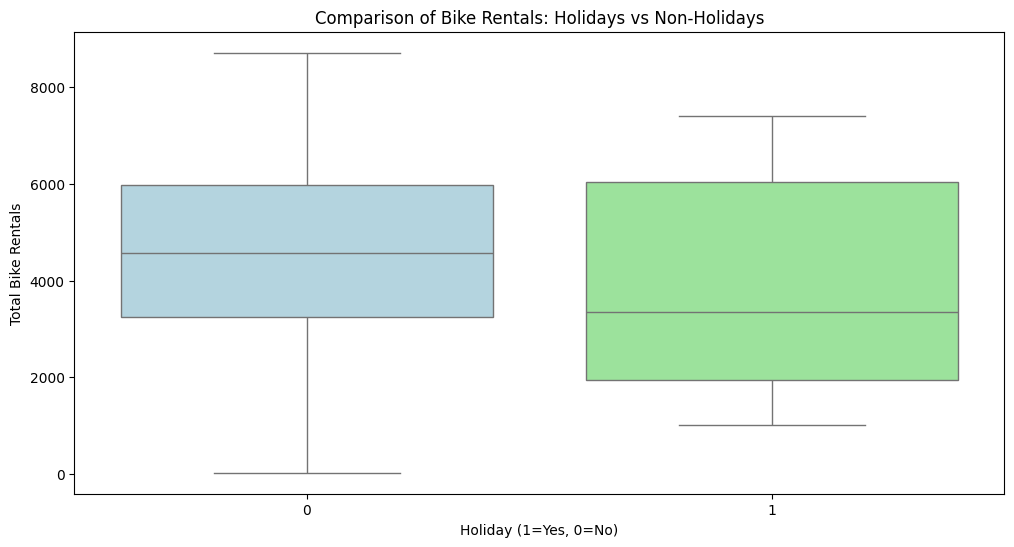

In [59]:
# Effect of holidays and weather conditions on daily bike rentals

plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_df, x='holiday_day', y='cnt_day', hue='holiday_day', palette=['lightblue', 'lightgreen'], legend=False)
plt.title('Comparison of Bike Rentals: Holidays vs Non-Holidays')
plt.xlabel('Holiday (1=Yes, 0=No)')
plt.ylabel('Total Bike Rentals')
plt.show()

### Pertanyaan 2: Apakah Cuaca terhadap Jumlah Penggunaan Sepeda?


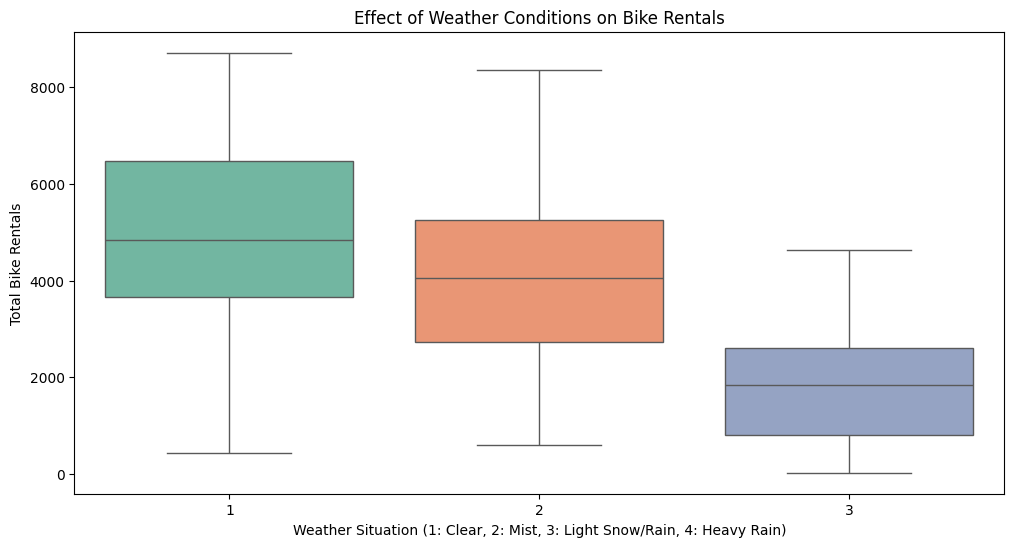

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_df, x='weathersit_day', y='cnt_day', palette='Set2')
plt.title('Effect of Weather Conditions on Bike Rentals')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain)')
plt.ylabel('Total Bike Rentals')
plt.show()

### Pertanyaan 3: Berapa Menyimpan Stok Sepeda yang Optimal Setiap Hari dan Setiap Jam?


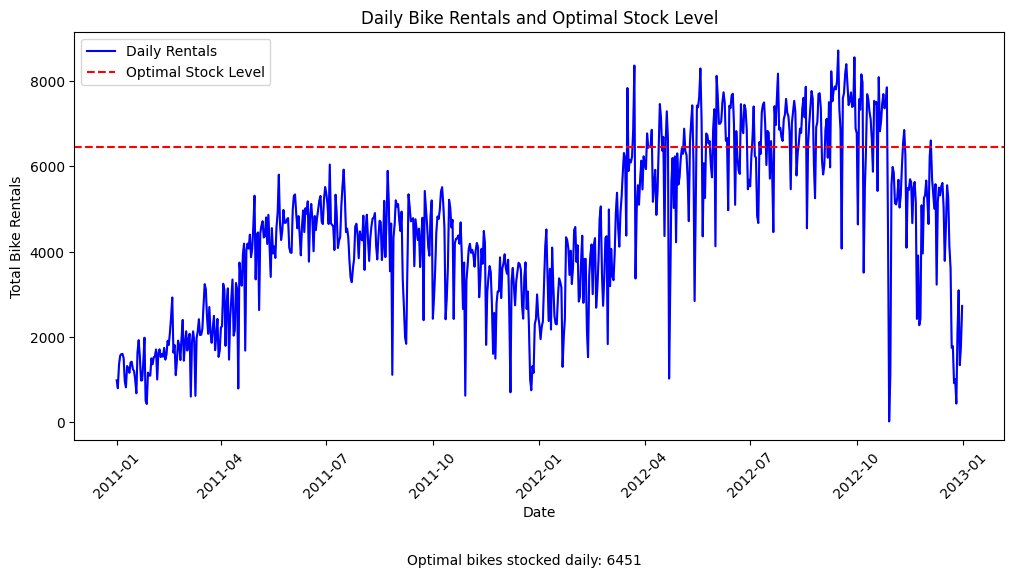

In [76]:
daily_mean_cnt = bike_df['cnt_day'].mean()
daily_std_cnt = bike_df['cnt_day'].std()
daily_optimal_stock = int(daily_mean_cnt + daily_std_cnt)

plt.figure(figsize=(12, 6))
sns.lineplot(data=bike_df, x='dteday', y='cnt_day', label='Daily Rentals', color='b')
plt.axhline(y=daily_optimal_stock, color='r', linestyle='--', label='Optimal Stock Level')
plt.title('Daily Bike Rentals and Optimal Stock Level')
plt.subplots_adjust(bottom=0.2)
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.figtext(0.5, 0.01, f'Optimal bikes stocked daily: {daily_optimal_stock}',ha='center', va='top')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Insight:**
- Pola penggunaan sepeda dipengaruhi oleh beberapa faktor, termasuk hari libur dan kondisi cuaca.
- Stok sepeda yang optimal dapat ditentukan berdasarkan rata-rata harian dan standar deviasi jumlah peminjaman sepeda.
- Dengan memahami pola penggunaan sepeda dan faktor-faktor yang mempengaruhinya, kita dapat meningkatkan efisiensi dan efektivitas layanan penyewaan sepeda.


## Conclusion

- Conclution pertanyaan 1

Dari visualisasi time series, terlihat fluktuasi jumlah pengguna harian sepeda, yang mungkin terkait dengan hari libur.
Boxplot yang membandingkan jumlah peminjaman sepeda pada hari libur dan hari biasa menunjukkan bahwa rata-rata peminjaman sepeda pada hari libur lebih rendah daripada pada hari biasa.
Hal ini mungkin disebabkan karena banyak orang beristirahat dan tidak bersepeda pada hari libur

- Conclution pertanyaan 2

Boxplot yang menunjukkan jumlah peminjaman sepeda berdasarkan kondisi cuaca menunjukkan bahwa jumlah peminjaman sepeda lebih tinggi saat cuaca cerah dan lebih rendah saat cuaca berkabut, hujan ringan, atau hujan lebat.karena orang cenderung lebih suka bersepeda saat cuaca baik dan lebih sedikit bersepeda saat cuaca buruk.

- Conclution pertanyaan 3

Dengan tingkat stok yang optimal, kita dapat meminimalkan kemungkinan kehabisan sepeda saat permintaan tinggi dan memaksimalkan efisiensi penggunaan stok Grafik yang menunjukkan jumlah peminjaman sepeda harian dan tingkat stok sepeda optimal dapat membantu dalam merencanakan stok sepeda dengan lebih baik.